# Importing Libararies


In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

# Importing Dataset


In [2]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv.xls")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Preprocessing


In [3]:
# Checking for any missing values across the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [5]:
data_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[Text(0, 0, '203')]

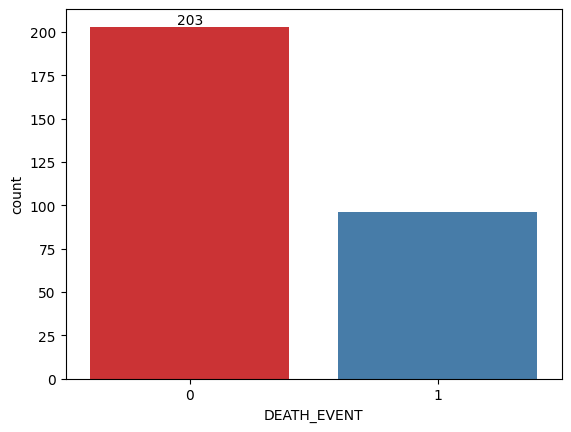

In [6]:
# Evaluating the target and finding out the potential skewness in the data
ax = sns.countplot(x=data_df["DEATH_EVENT"], palette="Set1")
ax.bar_label(ax.containers[0])

<Axes: >

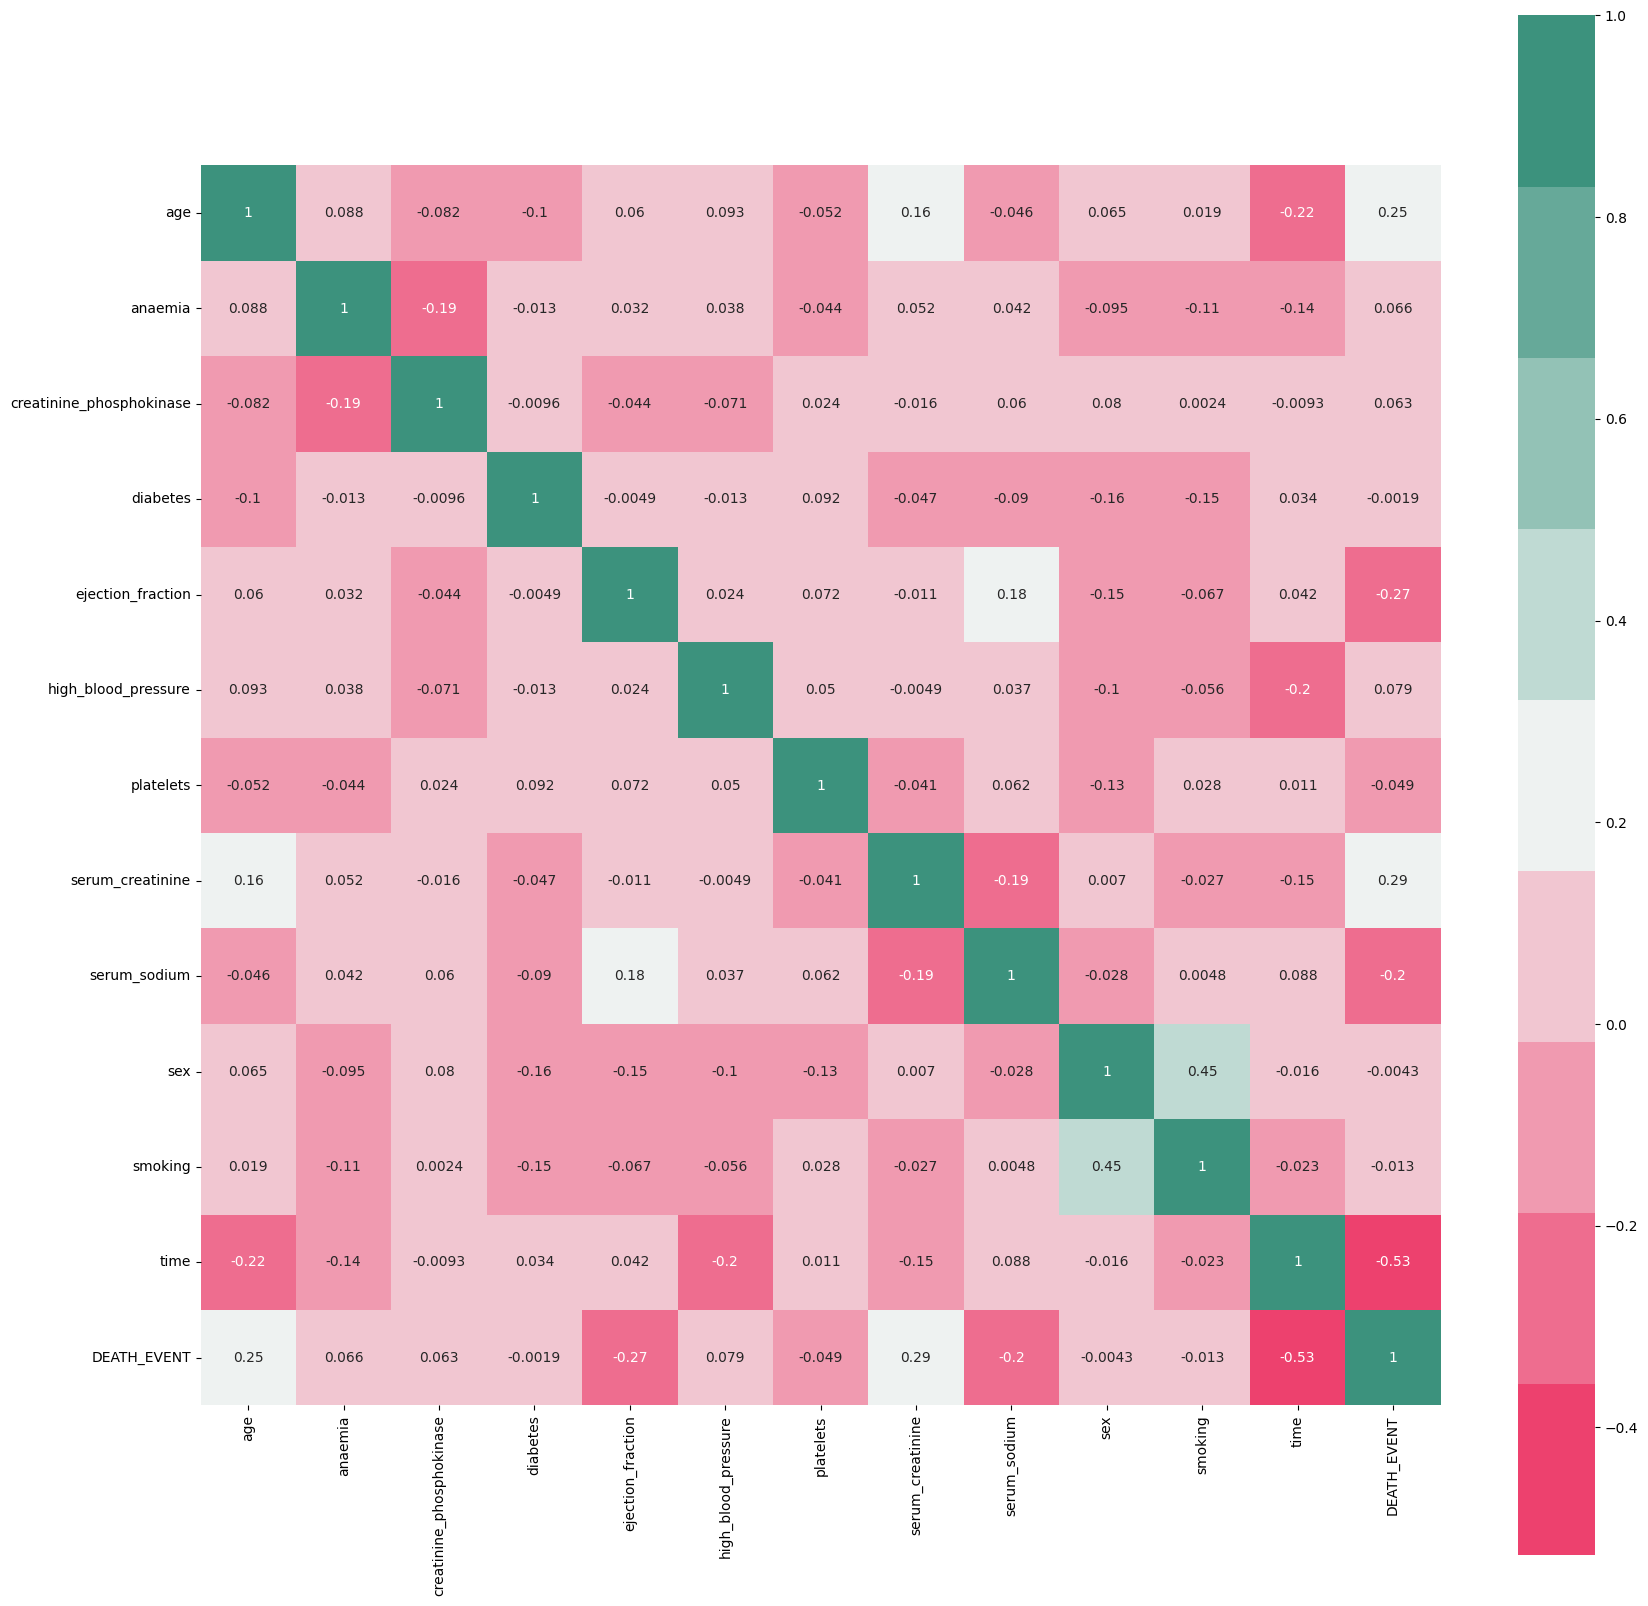

In [7]:
# Doing Bivariate Analysis by examaning a corelation matrix of all the features using heatmap
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = data_df.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)

Text(0.5, 1.0, 'Distribution Of Age')

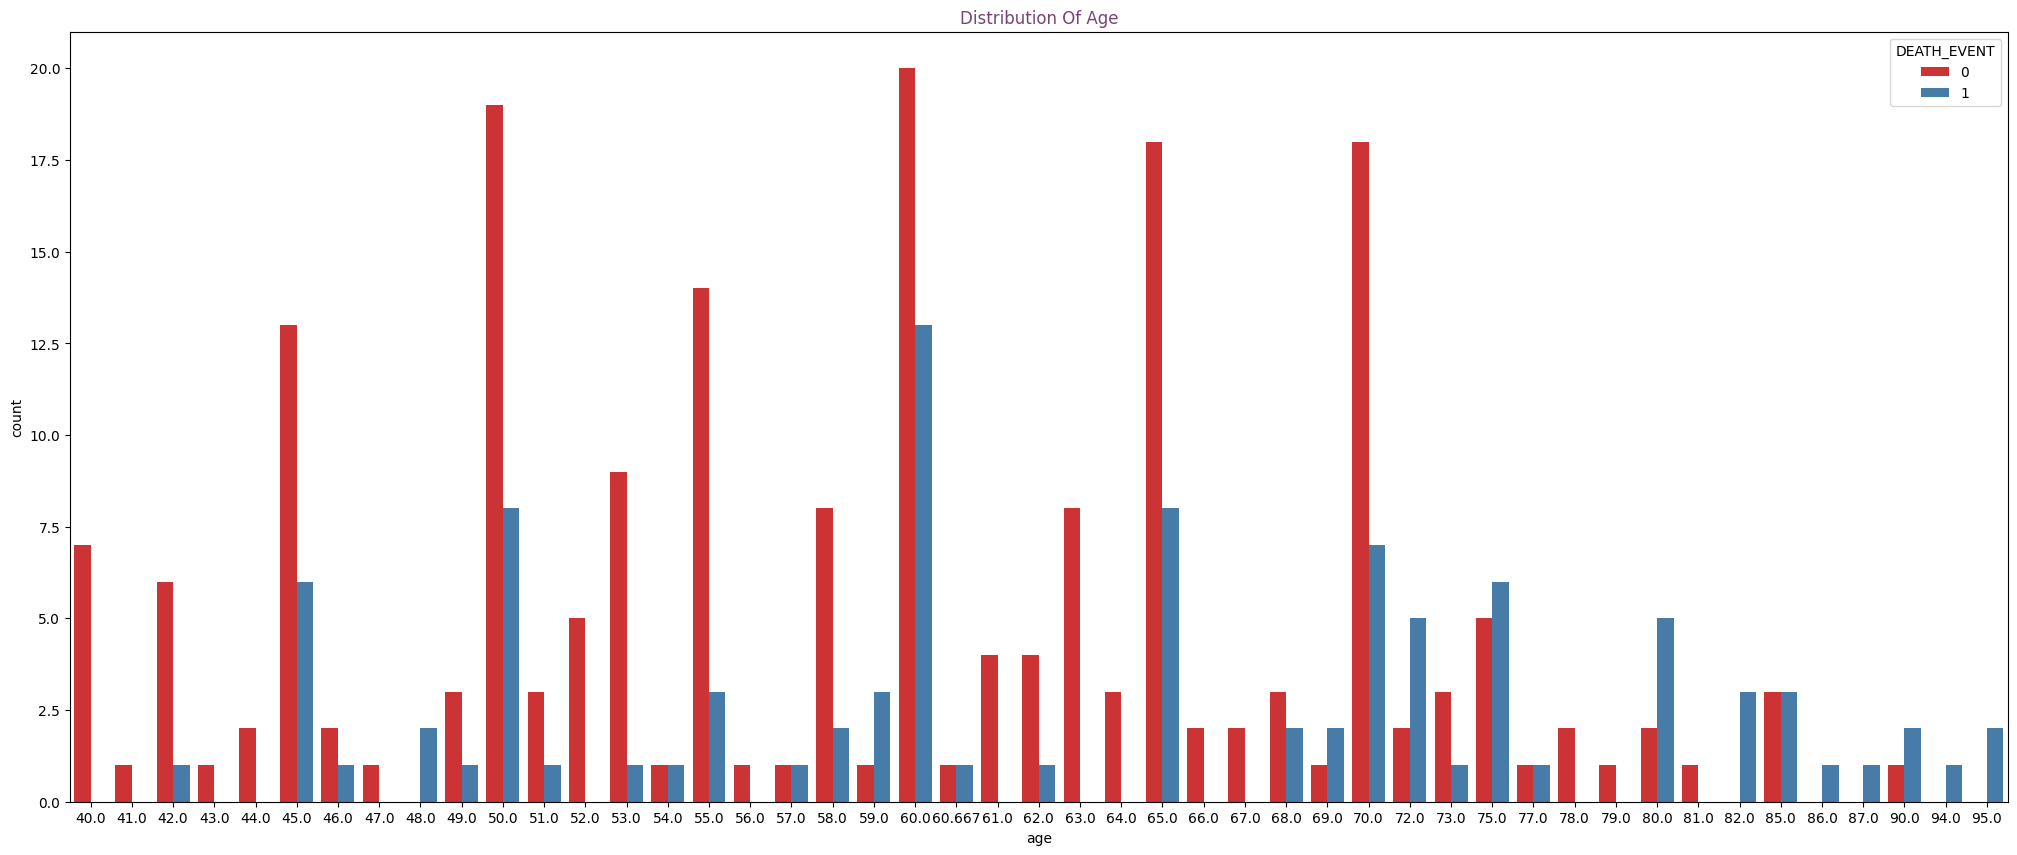

In [8]:
plt.figure(figsize=(25, 10))
Days_of_week = sns.countplot(
    x=data_df["age"], data=data_df, hue="DEATH_EVENT", palette="Set1"
)
Days_of_week.set_title("Distribution Of Age", color="#774571")

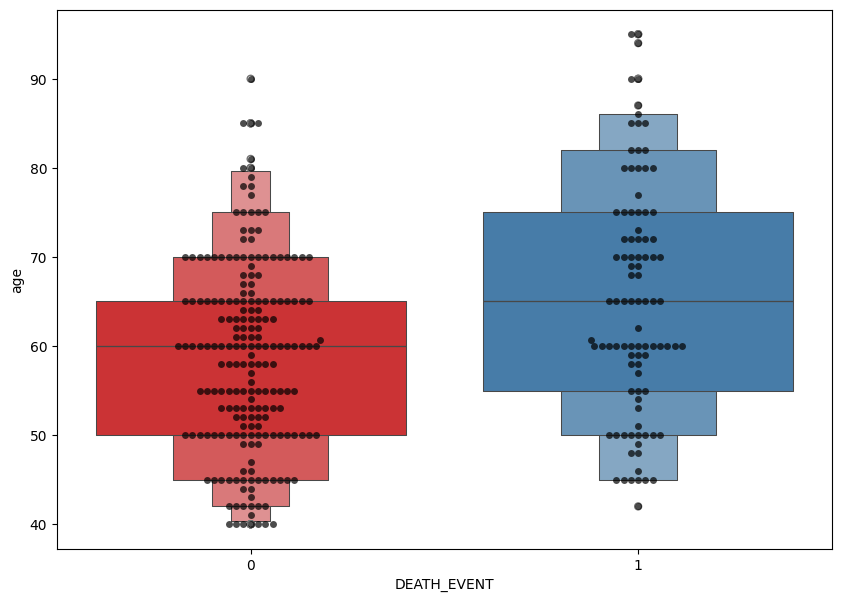

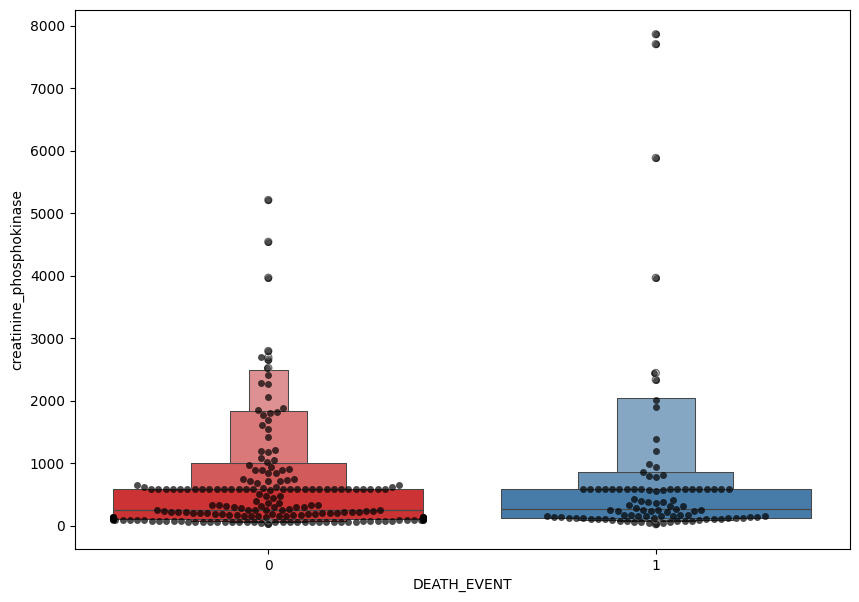

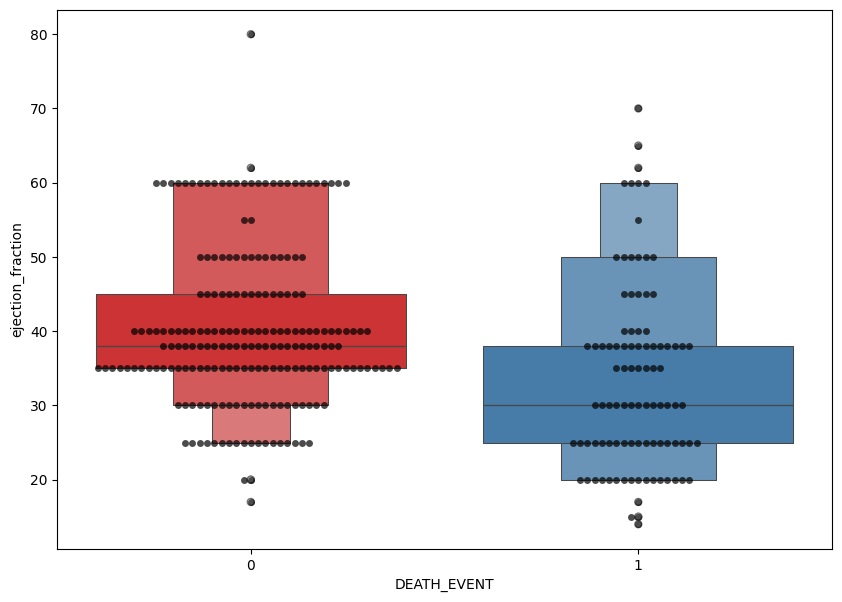

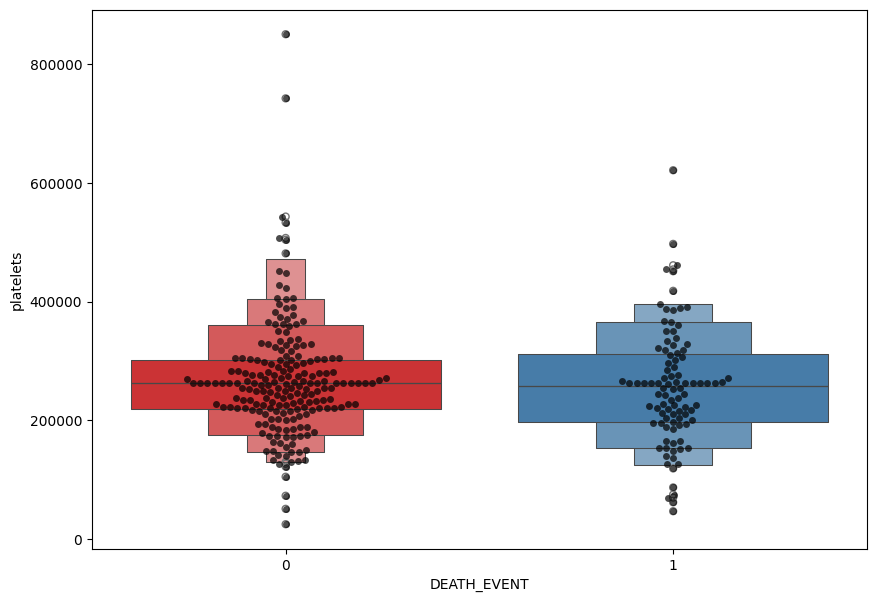

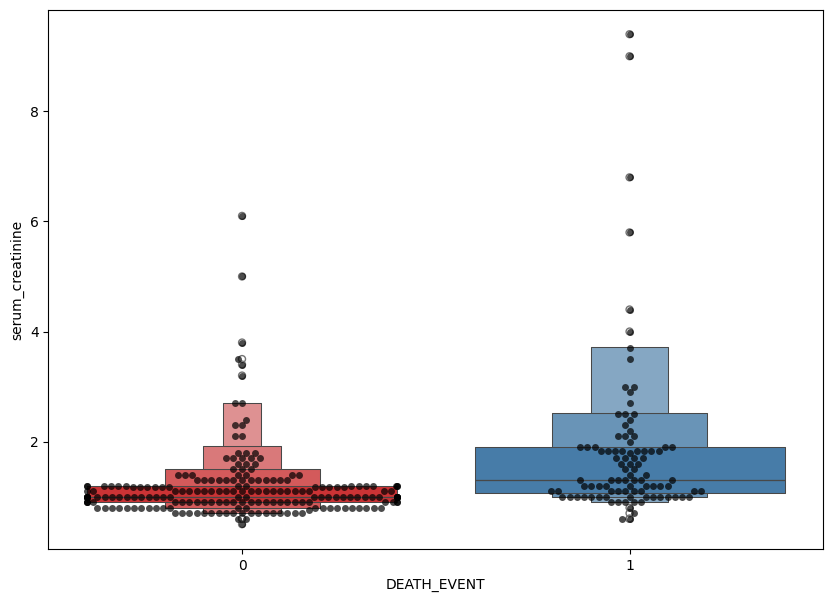

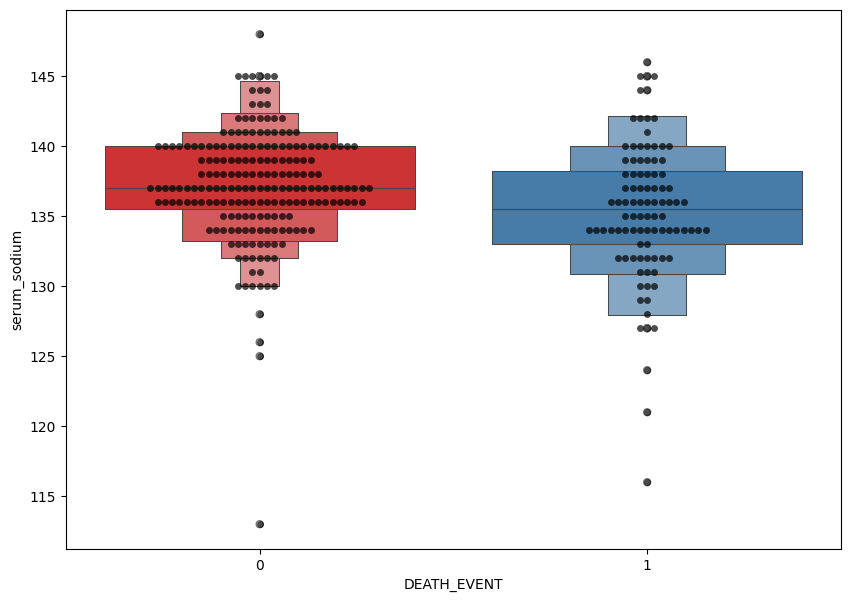

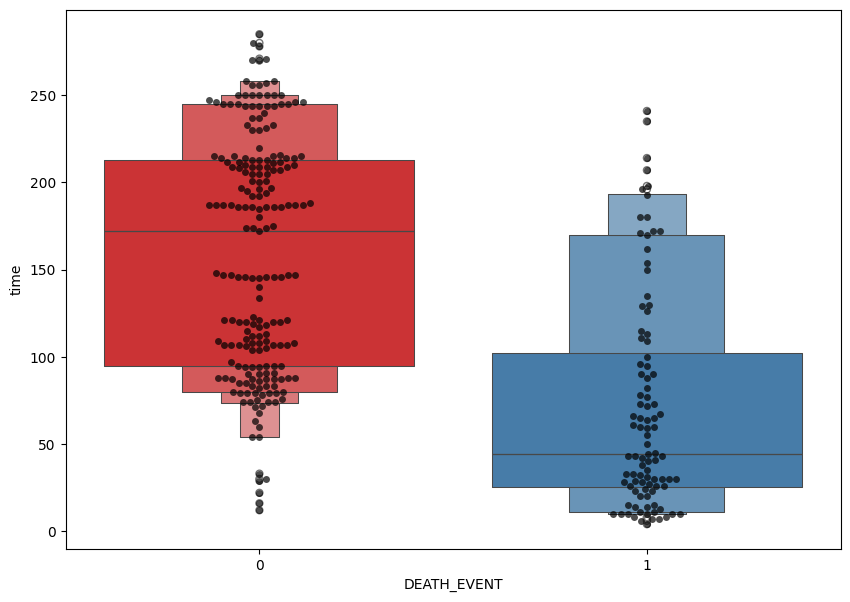

In [9]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = [
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "time",
]
for i in feature:
    plt.figure(figsize=(10, 7))
    sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], color="black", alpha=0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette="Set1")
    plt.show()

#


# Model Building


In [10]:
# Defining independent and dependent attributes in training and test sets
X = data_df.drop(["DEATH_EVENT"], axis=1)
y = data_df["DEATH_EVENT"]

In [11]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [12]:
# spliting variables into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=25
)

## 1. Support Vector Machine


In [13]:
print("Evaluation for Support Vector Machine".center(75, "_"))

svm_model = svm.SVC(kernel="linear")
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

print("Prediciton:    ", svm_pred)
print("_" * 75)

print("Accuracy:" + "\t" + f"{( svm_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(svm_precision * 100)}%")
print("Recall:" + "\t\t" f"{(svm_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(svm_f1 * 100)}%")
print("_" * 75)

___________________Evaluation for Support Vector Machine___________________
Prediciton:     [0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1]
___________________________________________________________________________
Accuracy:	77.77777777777779%
Precision:	67.85714285714286%
Recall:		63.33333333333333%
F1-Score:	65.51724137931035%
___________________________________________________________________________


In [15]:
print("Confusion Matrix For Support Vector Machine - 'Labels Test' & 'Prediction':")
print("-" * 93)
print(confusion_matrix(y_test, svm_pred))

Confusion Matrix For Support Vector Machine - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[51  9]
 [11 19]]


In [16]:
print(
    "Classification Report For Support Vector Machine - 'Labels Test' & 'Prediction':"
)
print("-" * 97)
print(classification_report(y_test, svm_pred))

Classification Report For Support Vector Machine - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        60
           1       0.68      0.63      0.66        30

    accuracy                           0.78        90
   macro avg       0.75      0.74      0.75        90
weighted avg       0.77      0.78      0.78        90



## 2. KNeighborsClassifier


In [17]:
print("Evaluation for K-Nearest Neighbors".center(75, "_"))

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

print("Prediciton:    ", knn_pred)
print("_" * 75)

print("Accuracy:" + "\t" + f"{(knn_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(knn_precision * 100)}%")
print("Recall:" + "\t\t" f"{(knn_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(knn_f1 * 100)}%")
print("_" * 75)

_____________________Evaluation for K-Nearest Neighbors____________________
Prediciton:     [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
___________________________________________________________________________
Accuracy:	72.22222222222221%
Precision:	61.904761904761905%
Recall:		43.333333333333336%
F1-Score:	50.98039215686274%
___________________________________________________________________________


In [18]:
print("Confusion Matrix For K-Nearest Neighbors - 'Labels Test' & 'Prediction':")
print("-" * 93)
print(confusion_matrix(y_test, knn_pred))

Confusion Matrix For K-Nearest Neighbors - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[52  8]
 [17 13]]


In [19]:
print("Classification Report For K-Nearest Neighbors - 'Labels Test' & 'Prediction':")
print("-" * 97)
print(classification_report(y_test, knn_pred))

Classification Report For K-Nearest Neighbors - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        60
           1       0.62      0.43      0.51        30

    accuracy                           0.72        90
   macro avg       0.69      0.65      0.66        90
weighted avg       0.71      0.72      0.71        90



## 3. Logistic Regression


In [21]:
print("Evaluation for Logistic Regression".center(75, "_"))

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
log_precision = precision_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

print("Prediciton:    ", log_pred)
print("_" * 75)

print("Accuracy:" + "\t" + f"{(log_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(log_precision * 100)}%")
print("Recall:" + "\t\t" f"{(log_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(log_f1 * 100)}%")
print("_" * 75)

_____________________Evaluation for Logistic Regression____________________
Prediciton:     [0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1]
___________________________________________________________________________
Accuracy:	84.44444444444444%
Precision:	76.66666666666667%
Recall:		76.66666666666667%
F1-Score:	76.66666666666667%
___________________________________________________________________________


In [22]:
print("Confusion Matrix For Logistic Regression - 'Labels Test' & 'Prediction':")
print("-" * 93)
print(confusion_matrix(y_test, log_pred))

Confusion Matrix For Logistic Regression - 'Labels Test' & 'Prediction':
---------------------------------------------------------------------------------------------
[[53  7]
 [ 7 23]]


In [23]:
print("Classification Report For Logistic Regression - 'Labels Test' & 'Prediction':")
print("-" * 97)
print(classification_report(y_test, log_pred))

Classification Report For Logistic Regression - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        60
           1       0.77      0.77      0.77        30

    accuracy                           0.84        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.84      0.84      0.84        90



# Comparsion


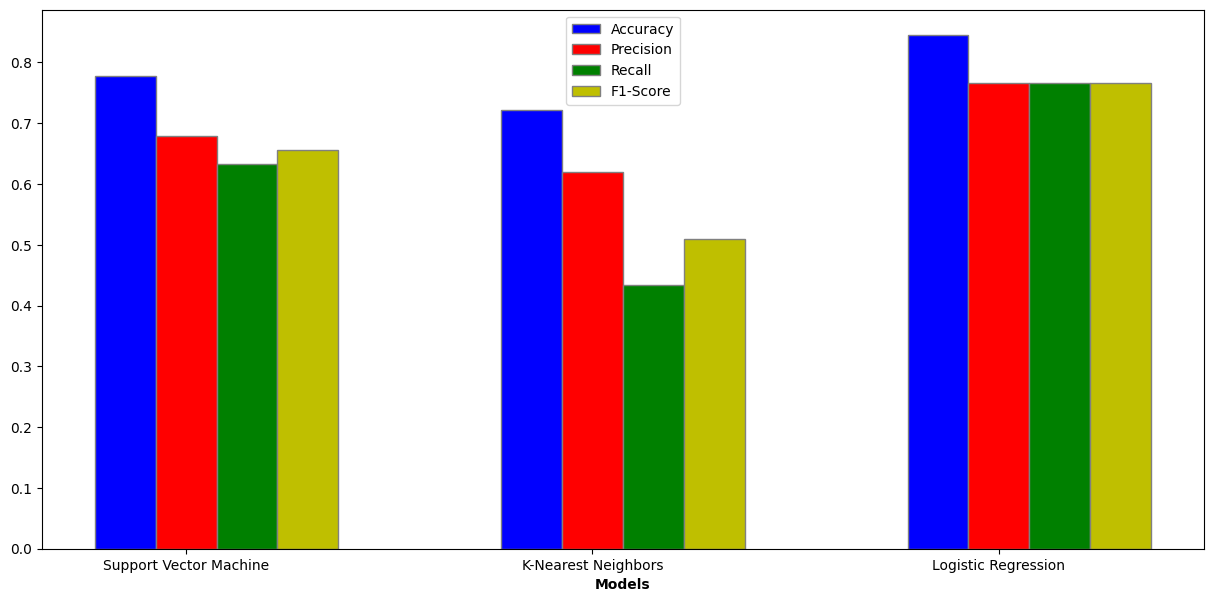

In [24]:
models = ["Support Vector Machine", "K-Nearest Neighbors", "Logistic Regression"]
accuracy = [svm_accuracy, knn_accuracy, log_accuracy]
precision = [svm_precision, knn_precision, log_precision]
recall = [svm_recall, knn_recall, log_recall]
f1 = [svm_f1, knn_f1, log_f1]

barWidth = 0.15

r1 = np.arange(len(accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(15, 7))

plt.bar(r1, accuracy, color="b", width=barWidth, edgecolor="grey", label="Accuracy")
plt.bar(r2, precision, color="r", width=barWidth, edgecolor="grey", label="Precision")
plt.bar(r3, recall, color="g", width=barWidth, edgecolor="grey", label="Recall")
plt.bar(r4, f1, color="y", width=barWidth, edgecolor="grey", label="F1-Score")

plt.xlabel("Models", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(accuracy))], models)

plt.legend()
plt.show()